# Practical Methodology

As you may already know, there are different steps for implementing and applying a deep moodel to a dataset. The steps are as follows:

1.   Defining the problem
2.   Data collection
3.   Preparing data
4.   Choosing an appropriate model
5.   Train the model
6.   Evaluating the model

  *   Selecting a proper evaluation metric
  *   Picking a suitable train/test split

7.   Hyperparameter Tuning

  *   Such as: batch size, number of epochs, learning rate, and ...

8.   Making Predictions

In this assignment we would like to practice picking the most appropiate model and hyperparameters to solve a deep learning problem.

This assignment comes in 3 parts. So let's get to it.



In [ ]:
#@title Run this cell to import all the required libraries

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
import PIL
import matplotlib.pyplot as plt

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D

## Part 1

### Data Preparation

In this part of the assignment we will be using horse or human dataset, which consists of images of horses and humans. This dataset is gathered for a binary classificaition problem.

In [ ]:
# Training Data
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
# Validation Data
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

--2021-05-15 19:36:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 142.250.73.208, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   170MB/s    in 0.8s    

2021-05-15 19:36:09 (170 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2021-05-15 19:36:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.253.62.128, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (

In [ ]:
# Get the Horse or Human dataset
path_horse_or_human = f"{getcwd()}/../content/horse-or-human.zip"
# Get the Horse or Human Validation dataset
path_validation_horse_or_human = f"{getcwd()}/../content/validation-horse-or-human.zip"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile
import shutil

shutil.rmtree('/tmp')
local_zip = path_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/training')
zip_ref.close()

local_zip = path_validation_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation')
zip_ref.close()

In [ ]:
# Define our example directories and files
train_dir = '/content/training'
validation_dir = '/content/validation'

train_horses_dir = os.path.join(train_dir, 'horses')
print(train_horses_dir)
train_humans_dir = os.path.join(train_dir, 'humans')
validation_horses_dir = os.path.join(validation_dir, 'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')
train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print(len(train_horses_fnames))
print(len(train_humans_fnames))
print(len(validation_horses_fnames))
print(len(validation_humans_fnames))

# Expected Output:
# 500
# 527
# 128
# 128

/content/training/horses
500
527
128
128


When working with deep models you might find yourself in a situation where there are not enough data to train your model with. This is where Keras's ImageDataGenerator comes in. It helps you augment your image data in real time while your model is training.

Augmentation helps you with creating samples that differs from the original sample by shifting, shearing, rotating, and ... the original image. Thus increases the total number of your training samples.

This [link](https://keras.io/api/preprocessing/image/) gives you all the information you need for ImageDataGenerator.

In [ ]:
# Now create an ImageDataGenerator instance for your training samples
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   rotation_range=5,  
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,)

# Now create an ImageDataGenerator instance for your testing samples
# Note that you shouldn't augment your test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to flow training images in a batch of 30 using train_datagen
# Input shape is (150, 150, 3)
train_generator = train_datagen.flow_from_directory(
        '/content/training',
        target_size=(150, 150),
        batch_size=30,
        class_mode='binary')

# Use flow_from_directory to flow test images in a batch of 30 using test_datagen
# Input shape is (150, 150, 3)
validation_generator = test_datagen.flow_from_directory(
        '/content/validation',
        target_size=(150, 150),
        batch_size=30,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Defining your model

In this section we would like to define a model using the deep networks you have already learned in class. Defining a model with appropriate complexity  and number of layers is of great importance.

Below you should define your model. <font color='red'>Define 3 models with different number of layers, filter sizes, pooling layers and dimensions. </font>

In [ ]:
# Define your model below with functional API

regularizer=keras.regularizers.l1(1e-4)

input = Input(shape=(150,150,3))
conv1 = Conv2D(16, kernel_size=(5, 5), activation='elu', kernel_regularizer=regularizer)(input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(32, kernel_size=(5, 5), activation='elu', kernel_regularizer=regularizer)(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

flat = Flatten()(pool2)
hidden1 = Dense(256, activation='elu', kernel_regularizer=regularizer)(flat)
output = Dense(1, activation='sigmoid', kernel_regularizer=regularizer)(hidden1)

model_no1 = Model(input, output)

In [ ]:
# Define your model below with functional API

regularizer=keras.regularizers.l1(1e-4)

input = Input(shape=(150,150,3))
conv1 = Conv2D(32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(input)
conv2 = Conv2D(32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(64, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(pool1)
conv4 = Conv2D(64, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(conv3)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(pool2)
conv6 = Conv2D(128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(conv5)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv6)

flat = Flatten()(pool3)
hidden1 = Dense(256, activation='elu', kernel_regularizer=regularizer)(flat)
output = Dense(1, activation='sigmoid', kernel_regularizer=regularizer)(hidden1)

model_no2 = Model(input, output)

In [ ]:
# Define your model below with functional API

regularizer=keras.regularizers.l1(1e-4)

input = Input(shape=(150,150,3))
conv1 = Conv2D(64, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(input)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(conv1)
conv3 = Conv2D(64, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(conv2)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(pool1)
conv5 = Conv2D(128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(conv4)
conv6 = Conv2D(128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(conv5)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv6)

conv7 = Conv2D(256, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(pool2)
conv8 = Conv2D(256, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(conv7)
conv9 = Conv2D(256, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(conv8)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv9)

flat = Flatten()(pool3)
hidden1 = Dense(512, activation='elu', kernel_regularizer=regularizer)(flat)
output = Dense(1, activation='sigmoid', kernel_regularizer=regularizer)(hidden1)

model_no3 = Model(input, output)

Now we would like our model to stop training right after it reaches a specified accuracy. This helps preventing the model from overfitting.

Define a custom callback using Keras's callbacks to stop training the model once it reaches 85% accuracy.

In [ ]:
ACCURACY_THRESHOLD = 0.85

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}): 
    if(logs.get('acc') > ACCURACY_THRESHOLD):   
      print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
      self.model.stop_training = True

Now it's time for compiling our models.

###**Adam(learning_rate=0.001)**

In [ ]:
# Choose the proper optimizer for your model (you should test your code with different optimizers and learning rates)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model_no1.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['acc']
)

model_no1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 69, 69, 32)        12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               9470

In [ ]:
# Choose the proper optimizer for your model (you should test your code with different optimizers and learning rates)

model_no2.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['acc']
)

model_no2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 34, 34, 64)        0   

In [ ]:
# Choose the proper optimizer for your model (you should test your code with different optimizers and learning rates)

model_no3.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['acc']
)

model_no3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 70, 70, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 68, 68, 128)       147584

#### Training Model

Now we can traing our model using our custom callback, train and test generators.

In [ ]:
callbacks = myCallback()
history_no1 = model_no1.fit(train_generator,
          epochs=100,
          validation_data=validation_generator,
          shuffle=True,
          callbacks=[callbacks])


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmp_z98zatn.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmp_z98zatn.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
35/35 [==============================] - ETA: 0s - loss: 9.5682 - acc: 0.5193WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f8b3c0938c0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBO

In [ ]:
callbacks = myCallback()
history_no2 = model_no2.fit(train_generator,
          epochs=100,
          validation_data=validation_generator,
          shuffle=True,
          callbacks=[callbacks])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmpko41awir.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmpko41awir.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
35/35 [==============================] - ETA: 0s - loss: 28.4831 - acc: 0.5311WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f8b106bdb00> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERB

In [ ]:
callbacks = myCallback()
history_no3 = model_no3.fit(train_generator,
          epochs=100,
          validation_data=validation_generator,
          shuffle=True,
          callbacks=[callbacks])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmpnwfx5vsa.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmpnwfx5vsa.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
35/35 [==============================] - ETA: 0s - loss: 34.4392 - acc: 0.5762WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f8b3eae39e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERB

Now it's time for plotting the training loss and accuracy of our 3 models using their histories.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

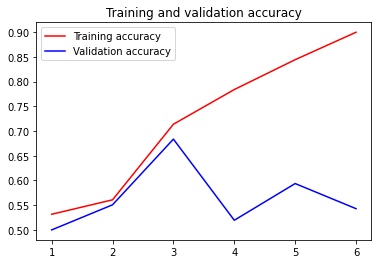

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_no1.history['acc']
val_acc = history_no1.history['val_acc']
loss = history_no1.history['loss']
val_loss = history_no1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

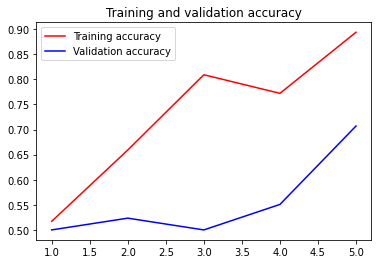

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_no2.history['acc']
val_acc = history_no2.history['val_acc']
loss = history_no2.history['loss']
val_loss = history_no2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

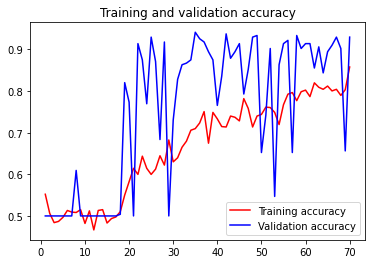

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_no3.history['acc']
val_acc = history_no3.history['val_acc']
loss = history_no3.history['loss']
val_loss = history_no3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

###**RMSprop(learning_rate=0.001)**

In [ ]:
# Choose the proper optimizer for your model (you should test your code with different optimizers and learning rates)

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model_no1.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['acc']
)

model_no1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               947020

In [ ]:
# Choose the proper optimizer for your model (you should test your code with different optimizers and learning rates)

model_no2.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['acc']
)

model_no2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 64)        0   

In [ ]:
# Choose the proper optimizer for your model (you should test your code with different optimizers and learning rates)

model_no3.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['acc']
)

model_no3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 144, 144, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 70, 70, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 68, 68, 128)       1475

#### Training Model

Now we can traing our model using our custom callback, train and test generators.

In [ ]:
callbacks = myCallback()
history_no1 = model_no1.fit(train_generator,
          epochs=100,
          validation_data=validation_generator,
          shuffle=True,
          callbacks=[callbacks])


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmppfny4k29.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmppfny4k29.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
35/35 [==============================] - ETA: 0s - loss: 10.0997 - acc: 0.5323WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f2ba03584d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERB

In [ ]:
callbacks = myCallback()
history_no2 = model_no2.fit(train_generator,
          epochs=100,
          validation_data=validation_generator,
          shuffle=True,
          callbacks=[callbacks])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmpd6vkuj3t.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmpd6vkuj3t.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
35/35 [==============================] - ETA: 0s - loss: 44.4482 - acc: 0.5498WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f2ba02a20e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERB

In [ ]:
callbacks = myCallback()
history_no3 = model_no3.fit(train_generator,
          epochs=100,
          validation_data=validation_generator,
          shuffle=True,
          callbacks=[callbacks])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmp0wtopzzm.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 2] No such file or directory: '/tmp/tmp0wtopzzm.py'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
35/35 [==============================] - ETA: 0s - loss: 1359.9640 - acc: 0.5091WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f2ba02ae8c0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VE

Now it's time for plotting the training loss and accuracy of our 3 models using their histories.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

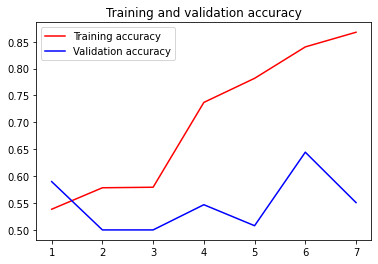

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_no1.history['acc']
val_acc = history_no1.history['val_acc']
loss = history_no1.history['loss']
val_loss = history_no1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

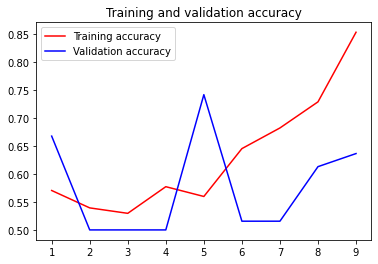

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_no2.history['acc']
val_acc = history_no2.history['val_acc']
loss = history_no2.history['loss']
val_loss = history_no2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

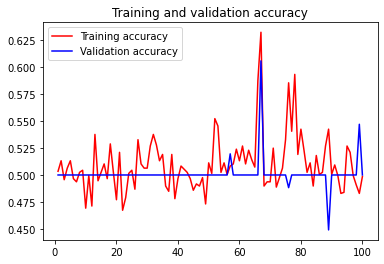

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_no3.history['acc']
val_acc = history_no3.history['val_acc']
loss = history_no3.history['loss']
val_loss = history_no3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

<font color='red'>Now compare and analyze the models. Please write your answers in the following cell.</font>

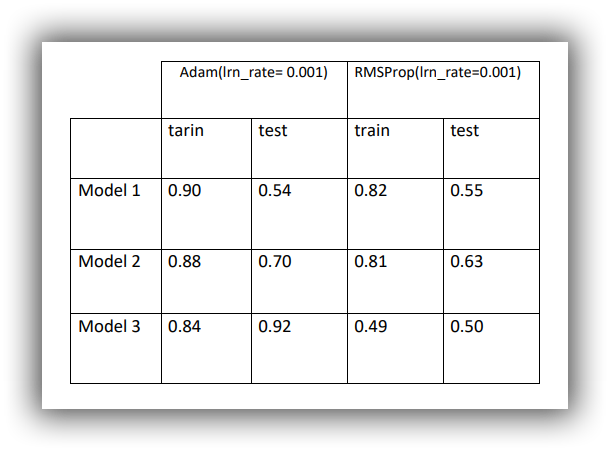

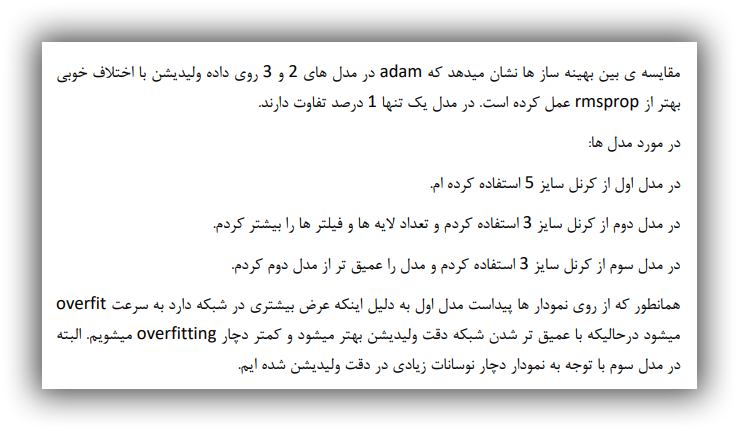

## Part 2

There are two ways to optimize your hyperparameters. The first one would be testing different hyperparameter values and see which values lead to the best performance. The second method is finding the best hyperparameters automatically by using algorithms such as grid search.

In this part we would like to explore these two methods.

### Manual Hyperparameter tuning

#### Preparing Data

It's Spring and it would be a great idea to train a model to identify different flowers :)

The dataset we'll be using for this part would be the flower dataset. Now the first step is to download the images. Run the cell below to download the images.

In [ ]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

Now let us see some beautiful flowers.

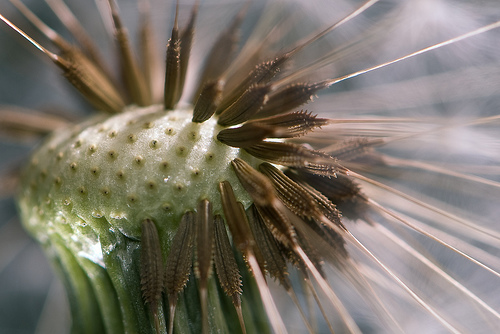

In [ ]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[4]))

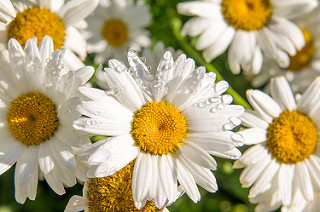

In [ ]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[2]))

Now that we have seen some of the images, we would want to create a dataset. To create a dataset we want to have a train and a test set.

In [ ]:
# Defining some parameters for our data

batch_size = 32
img_height = 180
img_width = 180

Now use image_dataset_from_directory to create datasets for validation and traning. Use a 0.2 split ratio for both. You also need to use the parameters defined in the cell above to create the datasets.

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(img_height,img_width),
    batch_size=batch_size,
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds  = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(img_height,img_width),
    batch_size=batch_size,
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


As you've seen by running the cell above, our dataset contains 5 classes. The classes are as follows:

In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In the following cell you should complete the function to normalize your dataset.

In [ ]:
def process(image, label):
  return (image / 255.0), label

In [ ]:
train_ds = train_ds.map(process).cache().shuffle(10000)
val_ds = val_ds.map(process).cache()

#### Create Model with BN

Now we would like to build our model. We will be using VGG blocks for our model. <font color='red'>Please create a model with batch nomralization layer and another model without batch normalization and compare the results.</font>

In [ ]:
def vgg_block(model_input, num_filters, num_conv_layers):
  # You should use your batch normalization layer here

  # add convolutional layers
  for conv_layer in range(num_conv_layers):
    model_input = Conv2D(num_filters, (3,3), padding='same', activation=None)(model_input)
    model_input = BatchNormalization()(model_input)
    model_input = Activation('relu')(model_input)

  # add max pooling layer
  block_output = MaxPooling2D((2,2), strides=(2,2))(model_input)
  return block_output

input = layers.Input(shape=(img_height, img_width, 3))
block = vgg_block(input, 64, 2)
# Now we need to prepare the output of our block for the dense layers
out = Flatten()(block)
dense_out = Dense(128, activation='relu')(out)
final_out = Dense(5, activation='softmax')(dense_out)

model1 = Model(inputs=input, outputs=final_out)

In [ ]:
# Compile the model here

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model1.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 180, 64)      1792      
_________________________________________________________________
batch_normalization_12 (Batc (None, 180, 180, 64)      256       
_________________________________________________________________
activation_10 (Activation)   (None, 180, 180, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 180, 180, 64)      36928     
_________________________________________________________________
batch_normalization_13 (Batc (None, 180, 180, 64)      256       
_________________________________________________________________
activation_11 (Activation)   (None, 180, 180, 64)      0   

#### Training with BN

Now let's train our model.

In [ ]:
epochs=10
history1 = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 14s 147ms/step - loss: 97.8920 - accuracy: 0.3345 - val_loss: 8.3250 - val_accuracy: 0.3488
Epoch 2/10
92/92 [==============================] - 14s 149ms/step - loss: 13.7842 - accuracy: 0.4368 - val_loss: 4.7240 - val_accuracy: 0.3243
Epoch 3/10
92/92 [==============================] - 14s 151ms/step - loss: 3.8036 - accuracy: 0.5419 - val_loss: 3.6570 - val_accuracy: 0.4005
Epoch 4/10
92/92 [==============================] - 13s 147ms/step - loss: 3.6090 - accuracy: 0.5834 - val_loss: 4.7133 - val_accuracy: 0.3978
Epoch 5/10
92/92 [==============================] - 13s 145ms/step - loss: 3.1346 - accuracy: 0.6031 - val_loss: 4.5243 - val_accuracy: 0.4564
Epoch 6/10
92/92 [==============================] - 13s 144ms/step - loss: 2.1158 - accuracy: 0.6779 - val_loss: 3.3422 - val_accuracy: 0.5245
Epoch 7/10
92/92 [==============================] - 13s 145ms/step - loss: 2.5270 - accuracy: 0.6555 - val_loss: 4.3631 - val_accuracy: 0.46

Visualizing training loss and accuracy

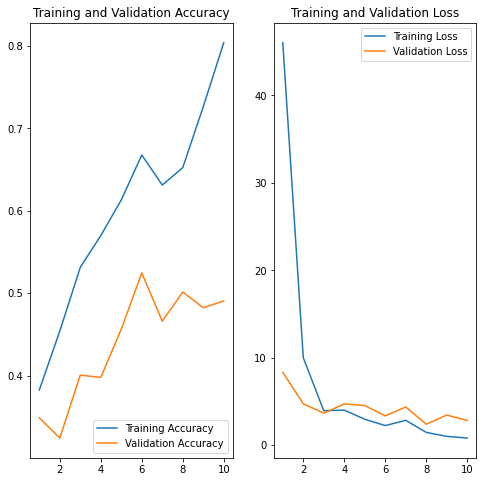

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Create Model without BN

In [ ]:
def vgg_block(model_input, num_filters, num_conv_layers):
  # In this block do not use batch normalization

  # add convolutional layers
  for conv_layer in range(num_conv_layers):
    model_input = Conv2D(num_filters, (3,3), padding='same', activation='relu')(model_input)

  # add max pooling layer
  block_output = MaxPooling2D((2,2), strides=(2,2))(model_input)
  return block_output

input = layers.Input(shape=(img_height, img_width, 3))
block = vgg_block(input, 64, 2)
# Now we need to prepare the output of our block for the dense layers
out = Flatten()(block)
dense_out = Dense(128, activation='relu')(out)
final_out = Dense(5, activation='softmax')(dense_out)

model2 = Model(inputs=input, outputs=final_out)

In [ ]:
# Compile the model here

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 180, 180, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 180, 180, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 90, 90, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 518400)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               66355328  
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 645 

#### Training without BN

Now let's train our model.

In [ ]:
epochs=10
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 9s 97ms/step - loss: 3.9275 - accuracy: 0.2438 - val_loss: 1.3553 - val_accuracy: 0.4237
Epoch 2/10
92/92 [==============================] - 9s 97ms/step - loss: 1.2998 - accuracy: 0.4691 - val_loss: 1.2065 - val_accuracy: 0.5082
Epoch 3/10
92/92 [==============================] - 9s 98ms/step - loss: 1.0185 - accuracy: 0.6312 - val_loss: 1.0973 - val_accuracy: 0.5559
Epoch 4/10
92/92 [==============================] - 9s 97ms/step - loss: 0.5526 - accuracy: 0.8229 - val_loss: 1.2726 - val_accuracy: 0.5599
Epoch 5/10
92/92 [==============================] - 9s 96ms/step - loss: 0.2186 - accuracy: 0.9376 - val_loss: 1.6793 - val_accuracy: 0.4932
Epoch 6/10
92/92 [==============================] - 9s 95ms/step - loss: 0.1116 - accuracy: 0.9713 - val_loss: 2.0279 - val_accuracy: 0.5613
Epoch 7/10
92/92 [==============================] - 9s 95ms/step - loss: 0.0331 - accuracy: 0.9964 - val_loss: 2.0921 - val_accuracy: 0.5613
Epoch 8/10
92

Visualizing training loss and accuracy

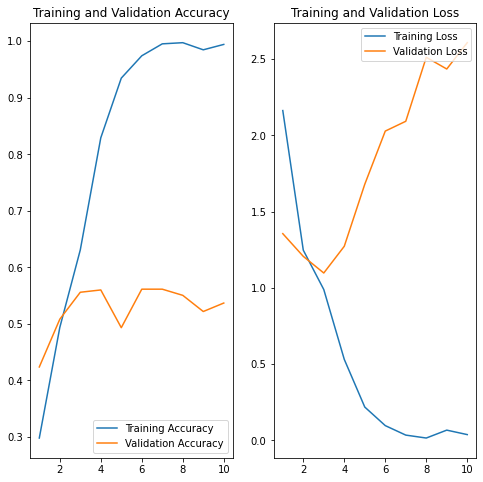

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now based on the plots analyze the results and write your answers in the cell below.

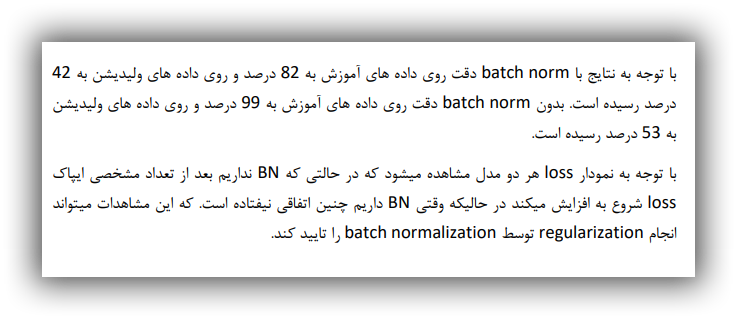



### Automatic Hyperparameter Tuning


Now we would like to use keras's Hyperparameter class to be able to use algorithms such as HyperBand to optimize our hyperparameters.

We can build a hyper model using 2 methods:


1.   Subclassing HyperModel
2.   Using a model builder function

In this assignment we aim to use the second option.

Using hyperparameter optimizer can also give us the best models (number of layers, hidden sizes, and ...)

#### Creating the Model

Now all we need to do is to create a building model function to be able to use the hyperparameter instance. To read further into HyperParameters class please feel free to take a look at Keras's official [documentation](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/)

In [ ]:
def build_model(hp):
  # hp is the hyperparameter instance with which you can sample your hyperparameters
  # such as hp.Choice
  inputs = layers.Input(shape=(img_height, img_height, 3))
  x = inputs
  # Now use the hp instance to choose the range of your convolution blocks.
  # There should be minimum 1 block and max 3 blocks.
  # Each block is a VGG block (like the previous part) and you should use hp.Int
  # to select your filter sizes. The step size for the range should be 32.
  # Instead of using max pooling at the end of each block you should use hp.Choice to
  # choose between max or average pooling
  # Also remember to give names to hp samples (please choose proper names)

  for i in range(hp.Int('conv_blocks', 1, 3, step=1)):
    filters = hp.Int('filters_' + str(i), 64, 256, step=32)
    for _ in range(2):
      x = tf.keras.layers.Convolution2D(
        filters, kernel_size=(3, 3), padding='same', activation='relu')(x)
    if hp.Choice('pooling_' + str(i), ['avg', 'max']) == 'max':
      x = MaxPooling2D()(x)
    else:
      x = AveragePooling2D()(x)

  
  # Now you should prepare your block's output for the next dense layers
  x = Flatten()(x)
  # We are all ready to sample our dense layers. Please add a dense layer to our
  # model but remember that your dense layer's hidden size should be an hp sample
  # so our HyperBand algorithm finds the best possible hidden size for our model
  x = tf.keras.layers.Dense(hp.Int('hidden_size', 128, 256, 128))(x)
  # Do the same with the dropout layer. Use hp.Float
  x = tf.keras.layers.Dropout(hp.Float('dropout', 0.1, 0.5, step=0.4, default=0.5))(x)
  outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

  model = tf.keras.Model(inputs, outputs)
  # Now we have to use hp to sample our learning rate
  model.compile(
    optimizer=tf.keras.optimizers.Adam(
                  hp.Choice('learning_rate', values=[1e-3, 1e-4])),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
  return model

Run the cell below to install kerastuner

In [ ]:
!pip install -q -U keras-tuner

The cell below creates an instance of kerastuner. We will call it tuner.

In [ ]:
import kerastuner as kt

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


Hyperparameter search is done by the cell below. The search method has got the same signature as keras.Model.fit.

In [ ]:
tuner.search(train_ds,
             validation_data=val_ds,
             epochs=30,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Trial 20 Complete [00h 00m 43s]
val_accuracy: 0.3828337788581848

Best val_accuracy So Far: 0.6008174419403076
Total elapsed time: 01h 16m 01s

Search: Running Trial #21

Hyperparameter    |Value             |Best Value So Far 
conv_blocks       |1                 |2                 
filters_0         |160               |224               
pooling_0         |avg               |max               
hidden_size       |128               |256               
dropout           |0.5               |0.5               
learning_rate     |0.001             |0.0001            
filters_1         |128               |224               
pooling_1         |max               |max               
filters_2         |256               |256               
pooling_2         |avg               |avg               
tuner/epochs      |2                 |2                 
tuner/initial_e...|0                 |0                 
tuner/bracket     |3                 |3                 
tuner/round       |0           

ResourceExhaustedError: ignored

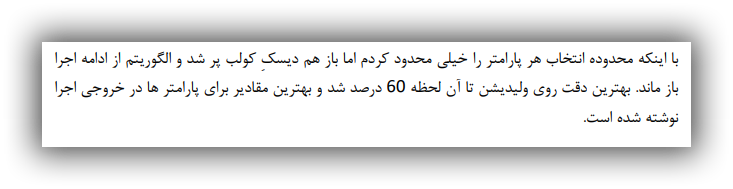

Each model will train for 30 epochs and 2 iterations of the Hyperband algorithm will be run. You can retrieve the best models found by calling get_best_models:

In [ ]:
best_model = tuner.get_best_models(1)[0]

get_best_hyperparameters gives us the best values for our hyperparameters.

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

## Part 3

Well good job on completing the previous parts. By the time you reach this part. You have become familiar with batch normalization and hyperparameter tuning. In this section we would like to dive more deeply into these concepts.

### Hyperparameter tuning algorithms

Please Name a couple of hyperparameter tuning algorithms. Explain 2 of them and state the pros and cons of each.

<font color='red'>Your Answer</font>

### Batch Normalization

What is batch normalization and why is it used? What are the benefits of using batch normalization?

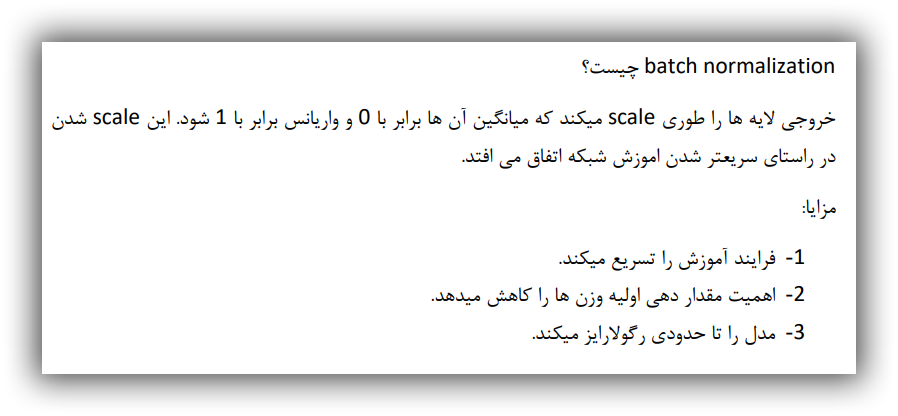

This is the end of Assignment 08. Hope you've learned new stuff. Good Luck :)